In [12]:
## MP 573 Lecture 7 (session 2): Properties of the Fourier Transform in N Dimensions
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal

## Convolution property

For any FT pairs $f_1(\boldsymbol{r}) \Leftrightarrow \hat{f}_1(\boldsymbol{u})$, and  $f_2(\boldsymbol{r}) \Leftrightarrow \hat{f}_2(\boldsymbol{u})$, the convolution of $f_1$ and $f_2$, $f_3(\boldsymbol{r}) = \left[ f_1 * f_2 \right] (\boldsymbol{r})$ has FT given by:
$$ \hat{f}_3(\boldsymbol{u}) = \hat{f}_1(\boldsymbol{u}) \cdot \hat{f}_2(\boldsymbol{u}) $$
In other words, *N-D convolution in the spatial domain becomes multiplication in the  frequency domain*. Similarly, *multiplication in the spatial domain becomes N-D convolution in the frequency domain*. This will become critical for understanding sampling and aliasing.  

In [31]:
# Load some image from file
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'brain_orig.mat')
mat_contents = sio.loadmat(mat_fname)
mat_contents
f = mat_contents['im_mr']
f1 = np.zeros((401,401))
f1[40:360,40:360] = f
sy,sx = f1.shape
FOV = 40
y,x = np.mgrid[-FOV/2:FOV/2:(1j*sx), -FOV/2:FOV/2:(1j*sy)]
dx = x[0,1]-x[0,0]
dy = y[1,0]-y[0,0]
Urange = 1/dx
v,u = np.mgrid[-Urange/2:Urange/2:(1j*sx), -Urange/2:Urange/2:(1j*sy)]

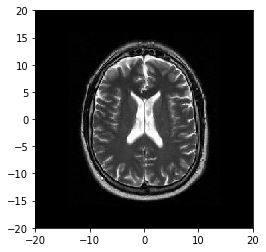

In [14]:
imgplot = plt.imshow(abs(f1),cmap='gray',extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])

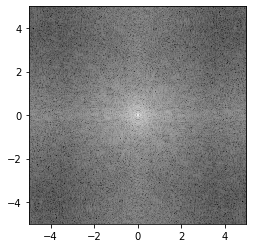

In [15]:
fhat1 = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f1)))
imgplot = plt.imshow(np.log(abs(fhat1)),cmap='gray',extent = [-Urange/2, Urange/2, -Urange/2, Urange/2])

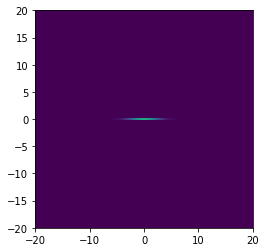

In [16]:
# Now filter

h = np.exp(-0.5*((x/2)**2 + (y/.1)**2))
hhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(h)))
imgplot = plt.imshow((abs(h)),extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])


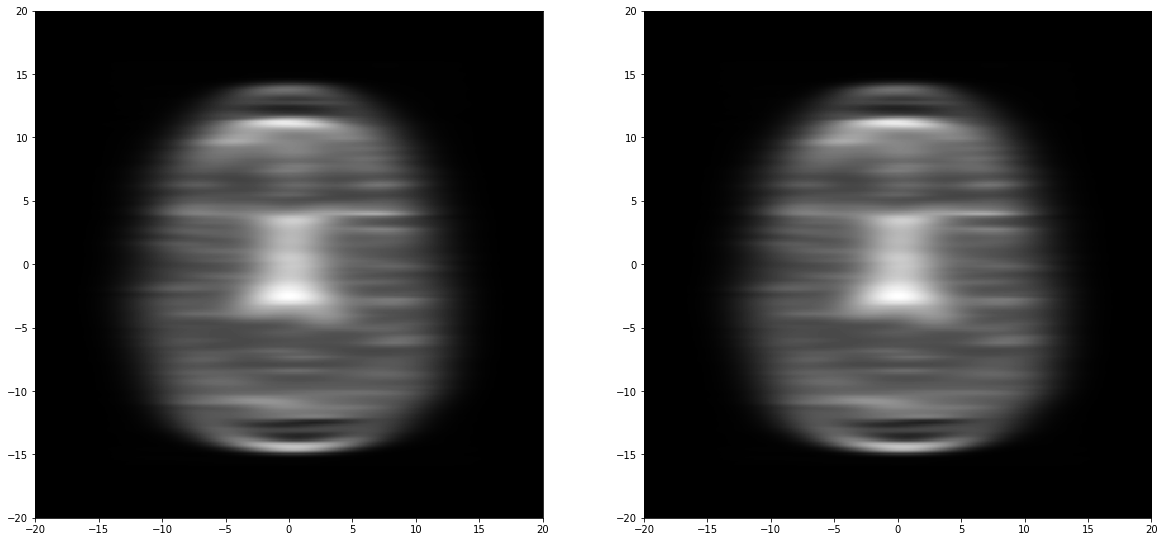

In [17]:
fhat2 = fhat1*hhat
f2 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat2)))
f3 = signal.fftconvolve(h,f1,'same')


plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
imgplot = plt.imshow((abs(f2)),cmap='gray',extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])
plt.subplot(1,2,2)
imgplot = plt.imshow((abs(f3)),cmap='gray',extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])

# Check whether the two versions are the same
#difference = np.linalg.norm(f3 - f2)/np.linalg.norm(f2)
#print("Norm of the difference: ||(f3 - f2)||/||f2|| = ", '{:f}'.format(difference))

## Central section theorem (aka projection-slice theorem)

Let us consider the 2D case for simplicity. For a given function (image) $f(x,y)$, we can define a projection along a certain direction parameterized by the angle $\theta$ as:
$$g_\theta (x^\prime) = \int_{y^\prime} f(x^\prime \cos \theta - y^\prime \sin \theta, x^\prime \sin \theta + y^\prime \cos \theta) d y^\prime$$
(see Figure in the lecture notes for an illustration). The Central Section Theorem states that the (1D) FT of $g_\theta (x^\prime)$ is the same as the radial line of the (2D) FT of $f(x,y)$, $\hat{f}(u,v)$ along the same angle $\theta$. This important result, with implications in tomographic image reconstruction and magnetic resonance imaging, is also known as the Central Slice Theorem or Projection-Slice Theorem.



Norm of the difference: =  0.000000


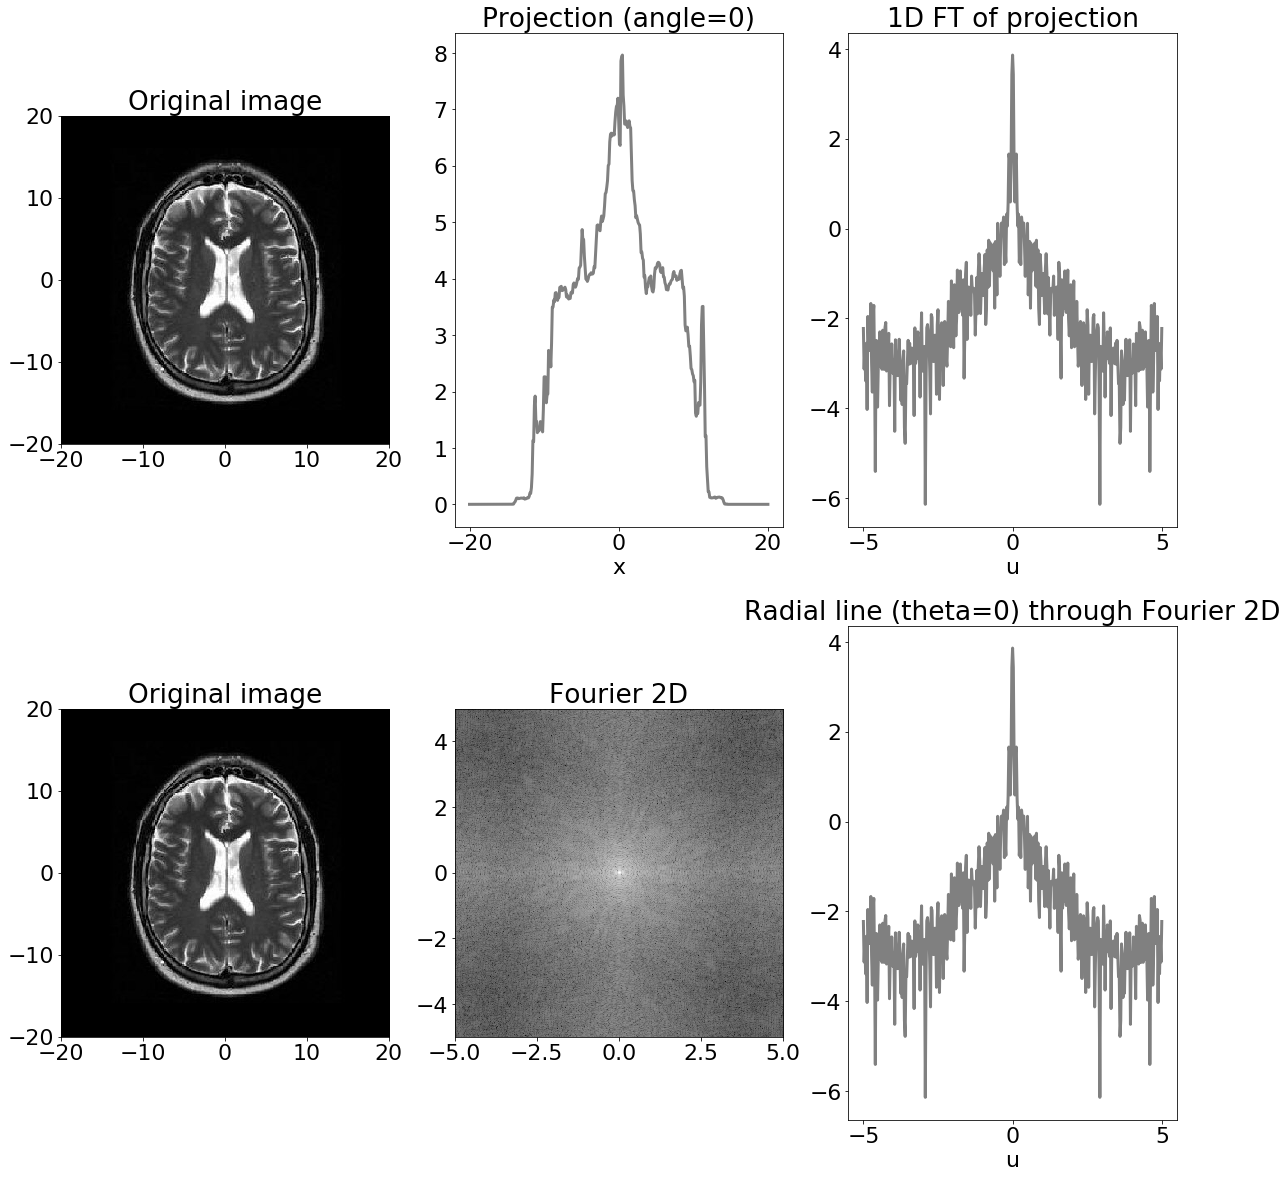

In [66]:
# Now let's try a projection with angle = 0 degrees (for simplicity)
p = np.sum(f1,axis=0)/np.sqrt(sy)

# Next, calculate the 1D FT of the projection signal
phat = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(p)))/np.sqrt(sx)

# Alternatively, calculate the 2D FT of the oritinal image
fhat1 = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f1)))/np.sqrt(sx*sy)

# Then, obtain a radial line (angle=0) through the 2D FT
fhat1_line = fhat1[int(np.floor(sy/2)),:]
#f1_line = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fhat1_line)))*np.sqrt(sx)

# (First row) Plot the original image, projection signal, 1D FT of projection 
# (Second row) Plot the original image, 2D FT, radial line through 2D FT
font = {'weight' : 'normal',
        'size'   : 22}
plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.rc('font', **font)
imgplot = plt.imshow((abs(f1)),cmap='gray',extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])
plt.title('Original image');
plt.subplot(2,3,2)
plt.rc('font', **font)
plt.plot(x[0,:],np.abs(p),'gray',linewidth=3.0)
#plt.axis([x[0,0],x[0,sx-1],np.min(np.abs(p)),np.max(np.abs(p))])
plt.xlabel('x')
plt.title('Projection (angle=0)');
plt.subplot(2,3,3)
plt.rc('font', **font)
plt.plot(u[0,:],np.log(np.abs(phat)),'gray',linewidth=3.0)
#plt.axis([-Urange/2,Urange/2,np.min(np.abs(phat)),np.max(np.abs(phat))])
plt.xlabel('u')
plt.title('1D FT of projection');
plt.subplot(2,3,4)
plt.rc('font', **font)
imgplot = plt.imshow((abs(f1)),cmap='gray',extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])
plt.title('Original image');
plt.subplot(2,3,5)
plt.rc('font', **font)
imgplot = plt.imshow(np.log(abs(fhat1)),cmap='gray',extent = [-Urange/2, Urange/2, -Urange/2, Urange/2])
plt.title('Fourier 2D');
plt.subplot(2,3,6)
plt.rc('font', **font)
plt.plot(u[0,:],np.log(np.abs(fhat1_line)),'gray',linewidth=3.0)
#plt.axis([-Urange/2,Urange/2,np.min(np.abs(phat)),np.max(np.abs(phat))])
plt.xlabel('u')
plt.title('Radial line (theta=0) through Fourier 2D');

# Check whether the two versions are the same
difference = np.linalg.norm(fhat1_line - phat)/np.linalg.norm(fhat1_line)
print("Norm of the difference: = ", '{:f}'.format(difference))

## Q1: Anisotropic spatial resolution

If we have an imaging system with impulse response defined by 

$$h(x,y) = e^{-\frac{1}{2}((\frac{x}{2.0})^2 + (\frac{y}{0.1})^2))}$$

this system will have better resolution in the x direction than in the y direction (TRUE/FALSE)


## Q2: Anisotropic spatial resolution in the Fourier domain

If we have the same imaging system as in Q1, with the same impulse response defined by 

$$h(x,y) = e^{-\frac{1}{2}((\frac{x}{2.0})^2 + (\frac{y}{0.1})^2))}$$

and corresponding Fourier transform $\hat{h}(u,v)$, this Fourier transform of the impulse response will be narrower in the $u$ dimension than in the $v$ dimension, ie: it will preserve more frequency components along $v$ (which corresponds to $y$) than along $u$ (which corresponds to $x$) from the input image (TRUE/FALSE)



## Q3: MRI vs CT

If we have a Fourier-based imaging system where we can sample the Fourier transform at arbitrary locations, and we choose to sample along radial lines going through the center of Fourier space (ie: like MRI), this is conceptually equivalent to measuring projections of the imaged object (or patient) along varios orientations (ie: like CT), since we can simply do a 1D Fourier transform on our projections in order to obtain the corresponding radial lines within the 2D Fourier space. 

(TRUE/FALSE)